In [10]:
import warnings
warnings.filterwarnings('ignore')

import re
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
!pip install nltk

In [12]:
df=pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\ChatGPT_Reviews.csv')
df

,Review Id,Review,Ratings,Review Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,8/23/2024 19:30
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,8/23/2024 19:28
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,8/23/2024 19:22
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,8/23/2024 19:20
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,8/23/2024 19:20
...,...,...,...,...
196722,462686ff-e500-413c-a6b4-2badc2e3b21d,Update 2023,5,7/27/2023 16:26
196723,f10e0d48-ecb6-42db-b103-46c0046f9be9,its grear,5,9/23/2023 16:25
196724,df909a49-90b5-4dac-9b89-c4bd5a7c2f75,Funtastic App,5,11/8/2023 13:57
196725,abe43878-973f-4e96-a765-c4af5c7f7b20,hi all,5,7/25/2023 15:32


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196727 entries, 0 to 196726
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Review Id    196727 non-null  object
 1   Review       196721 non-null  object
 2   Ratings      196727 non-null  int64 
 3   Review Date  196727 non-null  object
dtypes: int64(1), object(3)
memory usage: 6.0+ MB


In [14]:
df['Review'].fillna('No Review',inplace=True)

In [15]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords list (this is needed the first time you use it)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
def preprocess_text(text):
    text = text.lower()  
    text = re.sub(r'\d+', '', text)  
    text = re.sub(r'[^\w\s]', '', text)  
    text = re.sub(r'\s+', ' ', text)  
    stop_words = set(stopwords.words('english'))
    text = " ".join([word for word in text.split() if word not in stop_words])  
    return text

df['Cleaned Review'] = df['Review'].apply(preprocess_text)
df

,Review Id,Review,Ratings,Review Date,Cleaned Review
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,8/23/2024 19:30,good
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,8/23/2024 19:28,good
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,8/23/2024 19:22,nice app
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,8/23/2024 19:20,nice ig
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,8/23/2024 19:20,great app bot accurate anything gives tips gam...
...,...,...,...,...,...
196722,462686ff-e500-413c-a6b4-2badc2e3b21d,Update 2023,5,7/27/2023 16:26,update
196723,f10e0d48-ecb6-42db-b103-46c0046f9be9,its grear,5,9/23/2023 16:25,grear
196724,df909a49-90b5-4dac-9b89-c4bd5a7c2f75,Funtastic App,5,11/8/2023 13:57,funtastic app
196725,abe43878-973f-4e96-a765-c4af5c7f7b20,hi all,5,7/25/2023 15:32,hi


In [17]:
!pip install wordcloud

In [18]:
from wordcloud import WordCloud

In [19]:
import matplotlib.pyplot as plt

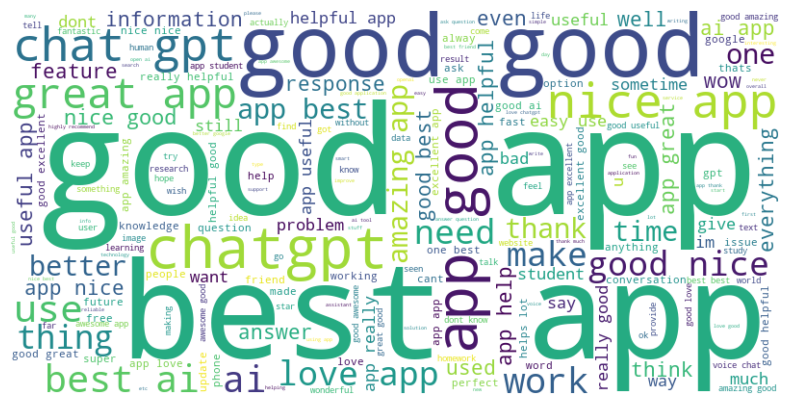

In [20]:
def word_cloud(df):
    text = " ".join(review for review in df['Cleaned Review'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

word_cloud(df)

In [21]:
!pip install textblob

In [22]:
from textblob import TextBlob

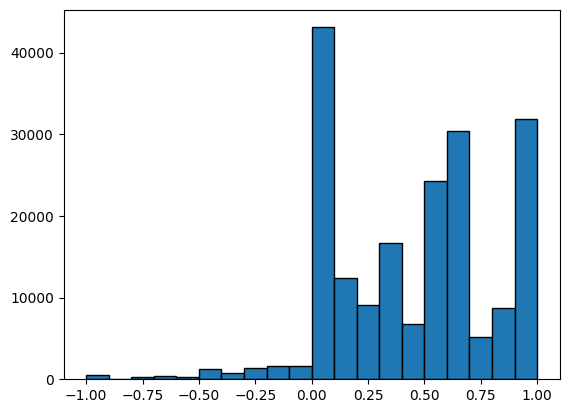

In [23]:
def analyze_sentiments(df):
    def analyze_sentiment(text):
        analysis = TextBlob(text)
        return analysis.polarity
    df['Sentiment'] = df['Review'].apply(analyze_sentiment)
    plt.hist(df['Sentiment'], bins=20, edgecolor='black')
    plt.show()
        
analyze_sentiments(df)

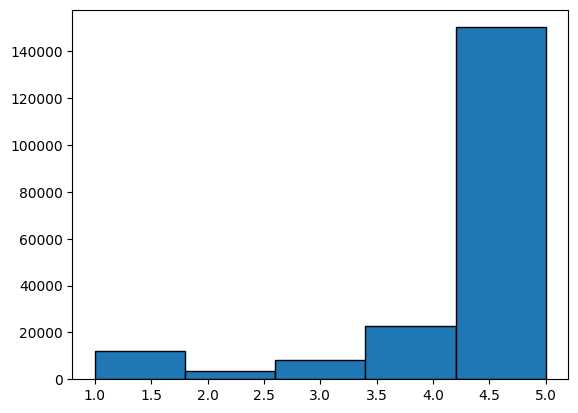

In [24]:
plt.hist(df['Ratings'], bins=5, edgecolor='black')
plt.show()

In [25]:
def sentiment_categorizer(polarity):
    if polarity>0.25:
        return "Positive"
    elif polarity<-0.25:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Sentiment'].apply(sentiment_categorizer)

In [26]:
df.drop(columns=['Review Id','Review','Review Date'],inplace=True)
object_columns = df.select_dtypes(['object']).columns
df[object_columns] = df[object_columns].astype('category')

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

label_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
inverse_label_mapping = {v: k for k, v in label_mapping.items()}  

y = df['Sentiment'].map(label_mapping)

X = df.drop(columns=['Sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = XGBClassifier(enable_categorical = True,tree_method='hist')
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7073400091495959
